# Algorithmes de classification

## Chargement et préparation des données

In [1]:
# Update libraries
!pip install -U pip
!pip install -U scikit-learn
!pip install xgboost
!pip install graphviz

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils 

In [2]:
# Install also graphviz utility
!apt update
!apt -y install graphviz

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://security.debian.org/debian-security buster/updates InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Reading package lists... Done3m
Building dependency tree       
Reading state information... Done
34 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-6+deb10u1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [3]:
import pandas as pd
import prepare

In [4]:
# IRIS dataset
train_X, test_X, train_y, test_y = prepare.prepare_iris()

In [5]:
# TITANIC dataset
train_X_titanic, test_X_titanic, train_y_titanic, test_y_titanic = prepare.prepare_titanic()

## Evaluation

### Principe général

In [6]:
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier

# Create a model
classifier = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit
classifier.fit(train_X, train_y)

# Predict
pred_y = classifier.predict(test_X)

# Evaluation
print(sklearn.metrics.confusion_matrix(test_y, pred_y))
print(sklearn.metrics.accuracy_score(test_y, pred_y))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
0.9666666666666667


### Indicateurs

In [7]:
# Confusion Matrix
sklearn.metrics.confusion_matrix(test_y, pred_y)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [8]:
# Accuracy
sklearn.metrics.accuracy_score(test_y, pred_y)

0.9666666666666667

In [9]:
# Recall
sklearn.metrics.recall_score(test_y, pred_y, average='macro')

0.9629629629629629

In [10]:
# Precision
sklearn.metrics.precision_score(test_y, pred_y, average='macro')

0.9722222222222222

In [11]:
# Recall by class
sklearn.metrics.recall_score(test_y, pred_y, average=None)

array([1.        , 0.88888889, 1.        ])

In [12]:
# Precision by class
sklearn.metrics.precision_score(test_y, pred_y, average=None)

array([1.        , 1.        , 0.91666667])

In [13]:
# Classification report
print(sklearn.metrics.classification_report(test_y, pred_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [14]:
# F1-Score
sklearn.metrics.f1_score(test_y, pred_y, average="macro")

0.9658994032395567

In [15]:
# F beta-score (beta=2 so F2-Score)
sklearn.metrics.fbeta_score(test_y, pred_y, beta=2, average="macro")

0.9637445887445888

### Courbe ROC

In [16]:
# Get the probs for each prediction
pred_y_prob = classifier.predict_proba(test_X)
print(pred_y_prob)

[[0.         0.97297297 0.02702703]
 [1.         0.         0.        ]
 [0.         0.11627907 0.88372093]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [0.         0.97297297 0.02702703]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [0.         0.97297297 0.02702703]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88

In [17]:
# Binary classification on Titanic
classifier_titanic = DecisionTreeClassifier(max_depth=2, random_state=42)
classifier_titanic.fit(train_X_titanic, train_y_titanic)
pred_y_titanic_prob = classifier_titanic.predict_proba(test_X_titanic)
pred_y_titanic = classifier_titanic.predict(test_X_titanic)

In [18]:
# Get ROC curve point
sklearn.metrics.roc_curve(test_y_titanic, pred_y_titanic_prob[:,1])

(array([0.        , 0.03809524, 0.04761905, 0.17142857, 1.        ]),
 array([0.        , 0.48648649, 0.5       , 0.71621622, 1.        ]),
 array([1.96153846, 0.96153846, 0.68181818, 0.48695652, 0.16179775]))

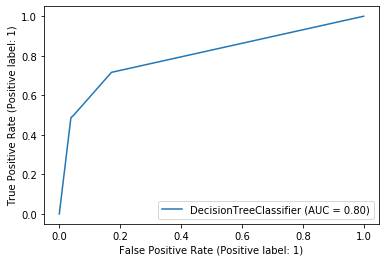

In [19]:
# Draw ROC curve
sklearn.metrics.plot_roc_curve(classifier_titanic, test_X_titanic, test_y_titanic)

In [20]:
# Area Under Curve (AUC)
sklearn.metrics.roc_auc_score(test_y_titanic, pred_y_titanic_prob[:,1])

0.8002574002574002

In [21]:
# AUC for Iris dataset
sklearn.metrics.roc_auc_score(test_y, pred_y_prob, average='macro', multi_class='ovr')

0.9815278938085955

## Arbres de décision et algorithmes dérivés

### Arbres de décision

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# Create a model (IRIS dataset)
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [23]:
# Export as dot file
class_names = ['Setosa','Versicolor','Virginica']
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
export_graphviz(tree_classifier, out_file='temp/tree_iris.dot', class_names=class_names, feature_names=feature_names, rounded=True, filled=True)

In [24]:
# Convert dot file to png
!dot -Tpng temp/tree_iris.dot -o temp/tree_iris.png -Gdpi=600

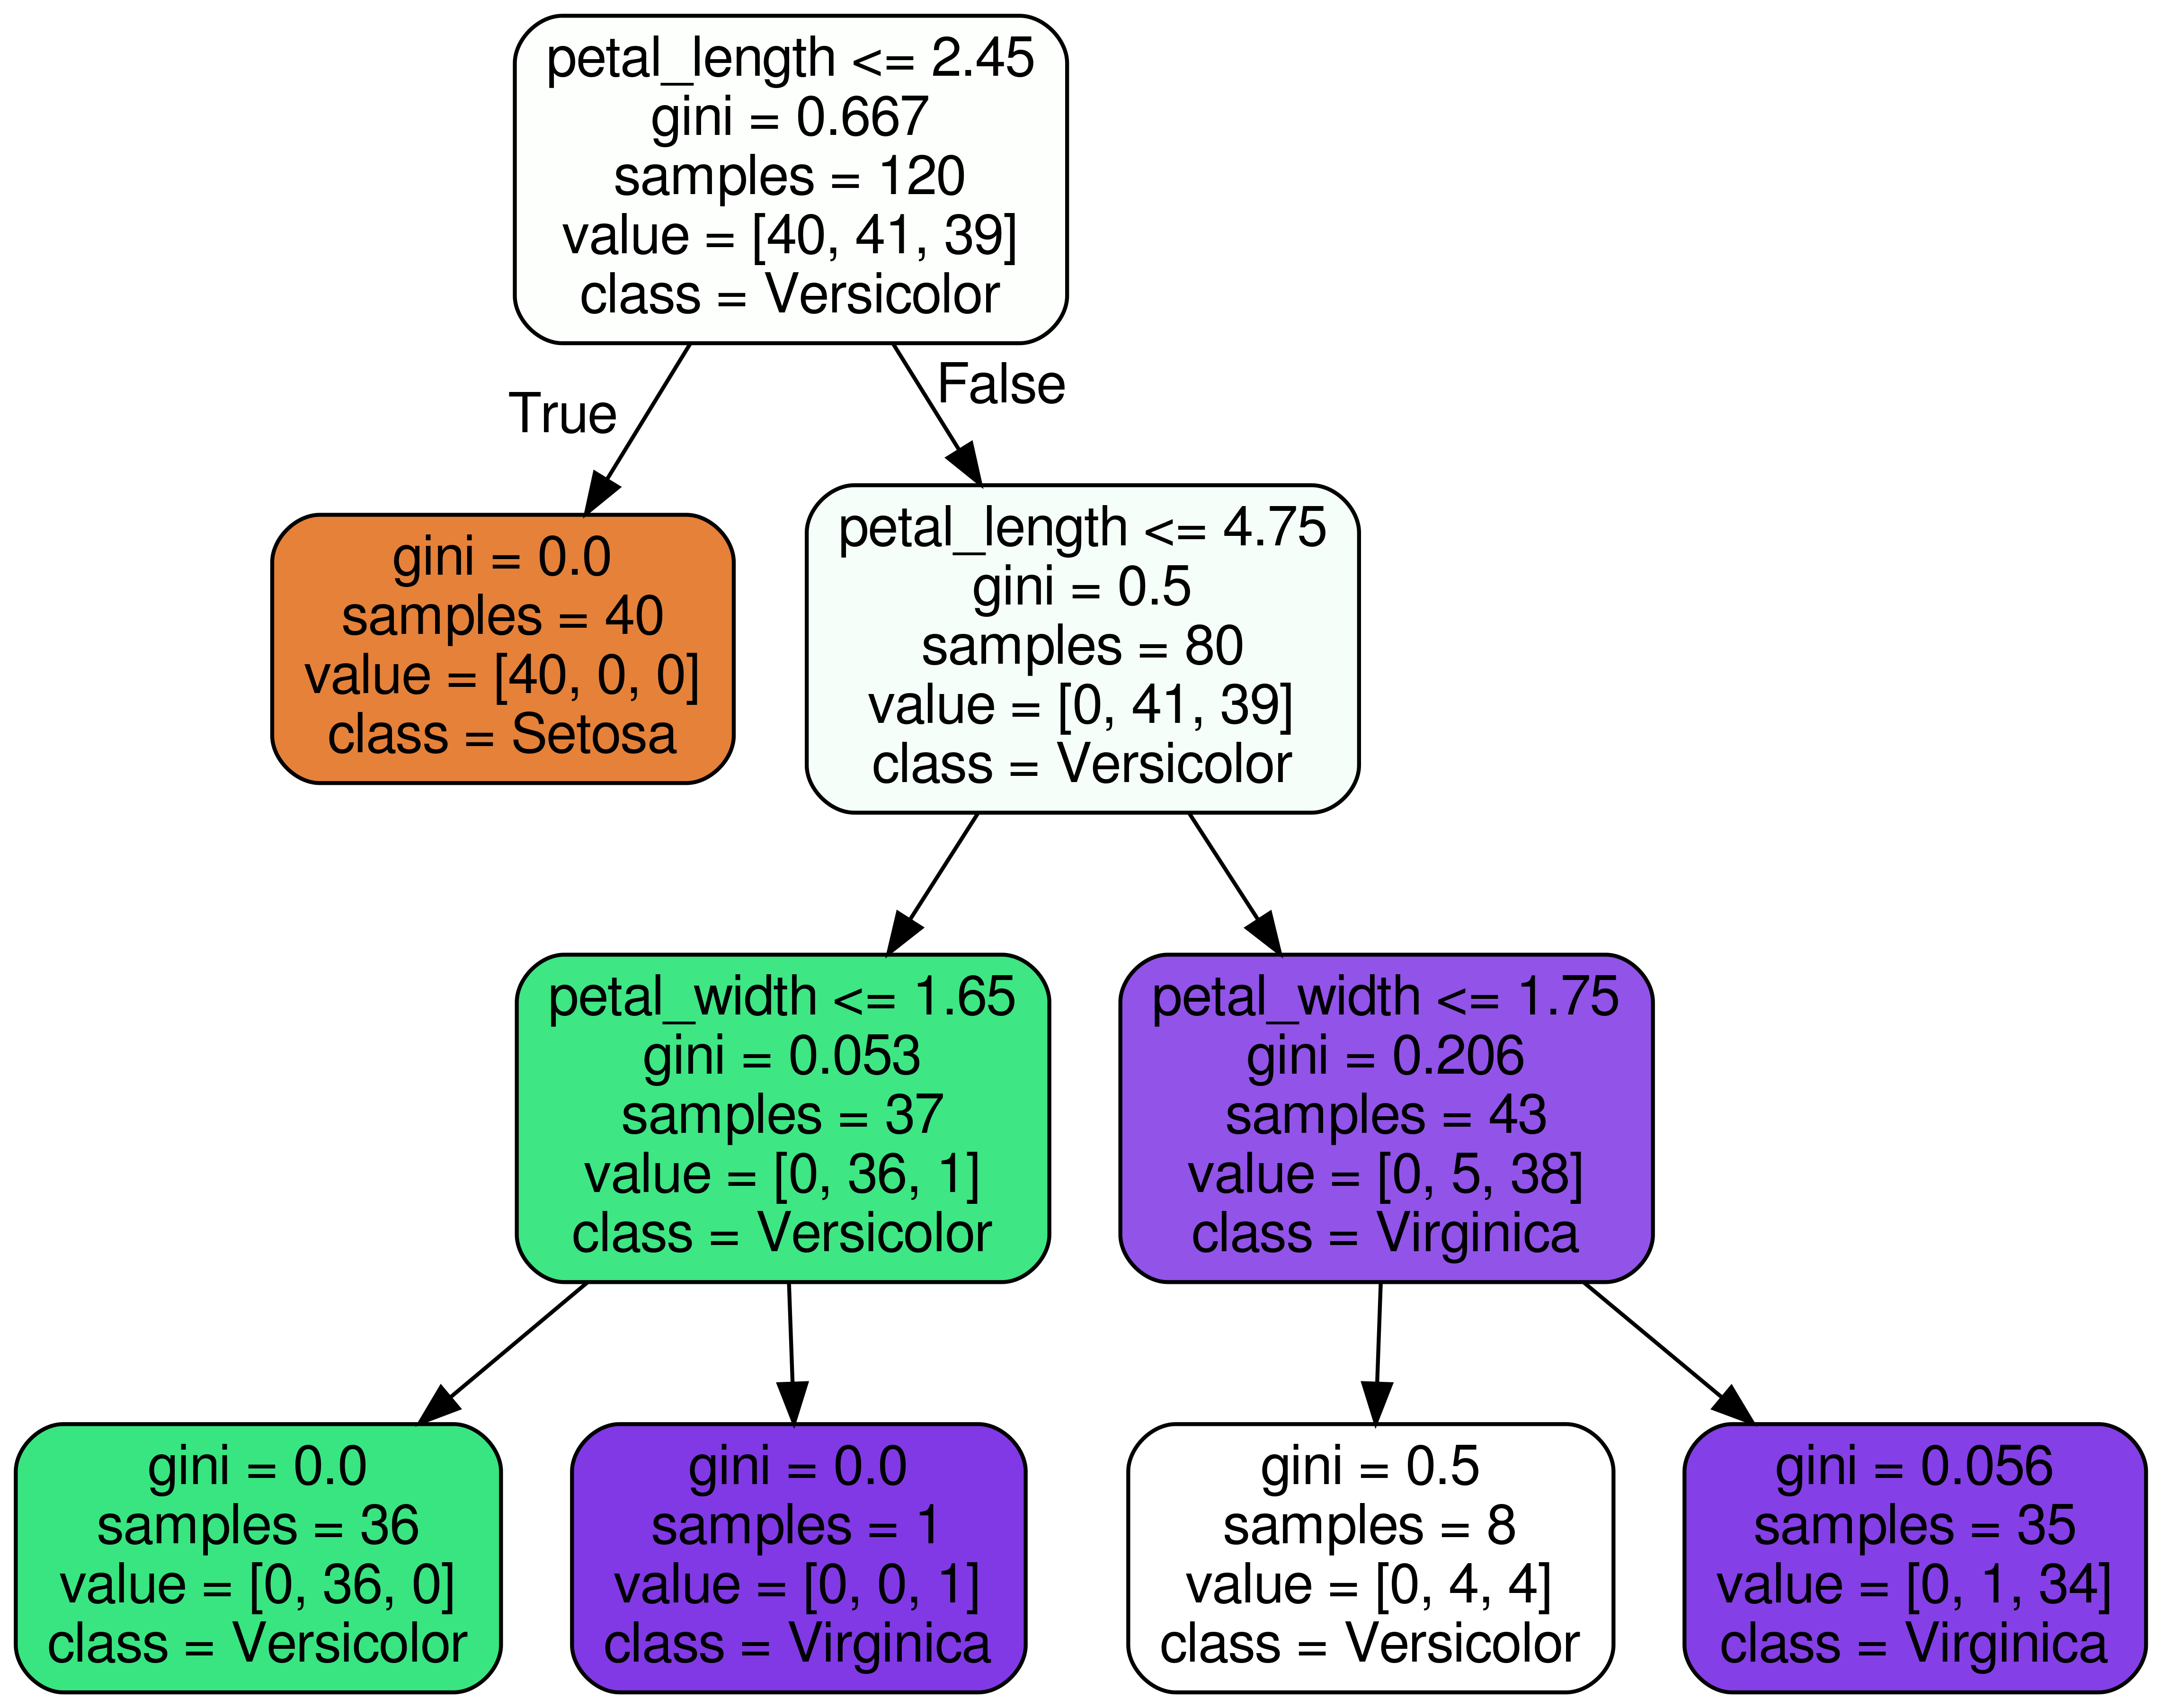

In [25]:
# Display image
from IPython.display import Image
Image(filename = 'temp/tree_iris.png')

In [26]:
# Tree implementation
def predict_iris(element):
    if element['petal_length'] <= 2.45:
        return 'Setosa'
    else:
        if element['petal_length'] <= 4.75:
            if element['petal_width'] <= 1.65:
                return 'Versicolor'
            else:
                return 'Virginica'
        else:
            if element['petal_width'] <= 1.75:
                return 'Versicolor'
            else:
                return 'Virginica'

In [27]:
# Apply tree to the test dataset (= get prediction)
test_X.apply(predict_iris, axis=1)

73     Versicolor
18         Setosa
118     Virginica
78     Versicolor
76     Versicolor
31         Setosa
64     Versicolor
141     Virginica
68     Versicolor
82     Versicolor
110     Virginica
12         Setosa
36         Setosa
9          Setosa
19         Setosa
56     Versicolor
104     Virginica
69     Versicolor
55     Versicolor
132     Virginica
29         Setosa
127     Virginica
26         Setosa
128     Virginica
131     Virginica
145     Virginica
108     Virginica
143     Virginica
45         Setosa
30         Setosa
dtype: object

In [28]:
# Tree implementation with prob
def predict_proba_iris(element):
    if element['petal_length'] <= 2.45:
        return [1,0,0]
    else:
        if element['petal_length'] <= 4.75:
            if element['petal_width'] <= 1.65:
                return [0,1,0]
            else:
                return [0,0,1]
        else:
            if element['petal_width'] <= 1.75:
                return [0,0.5,0.5]
            else:
                return [0,0.03,0.97]

In [29]:
# Apply tree with probs to the test dataset (= get prediction)
test_X.apply(predict_proba_iris, axis=1)

73           [0, 1, 0]
18           [1, 0, 0]
118    [0, 0.03, 0.97]
78           [0, 1, 0]
76       [0, 0.5, 0.5]
31           [1, 0, 0]
64           [0, 1, 0]
141    [0, 0.03, 0.97]
68           [0, 1, 0]
82           [0, 1, 0]
110    [0, 0.03, 0.97]
12           [1, 0, 0]
36           [1, 0, 0]
9            [1, 0, 0]
19           [1, 0, 0]
56           [0, 1, 0]
104    [0, 0.03, 0.97]
69           [0, 1, 0]
55           [0, 1, 0]
132    [0, 0.03, 0.97]
29           [1, 0, 0]
127    [0, 0.03, 0.97]
26           [1, 0, 0]
128    [0, 0.03, 0.97]
131    [0, 0.03, 0.97]
145    [0, 0.03, 0.97]
108    [0, 0.03, 0.97]
143    [0, 0.03, 0.97]
45           [1, 0, 0]
30           [1, 0, 0]
dtype: object

In [30]:
# Features importance
tree_classifier.feature_importances_

array([0.        , 0.        , 0.93462632, 0.06537368])

### Random Forest

In [31]:
# Random Forest on Titanic dataset
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
random_forest.fit(train_X_titanic, train_y_titanic)
pred_y_titanic = random_forest.predict(test_X_titanic)
print(sklearn.metrics.classification_report(test_y_titanic, pred_y_titanic))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       105
           1       0.86      0.69      0.77        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [32]:
# Features importance
random_forest.feature_importances_

array([1.26261269e-01, 1.23934471e-01, 1.60958020e-01, 7.53215459e-02,
       1.75550425e-02, 1.53014429e-02, 7.99326901e-03, 2.29281216e-02,
       2.99572976e-04, 4.49447246e-01])

### XGBoost

In [46]:
# XGBoost on Titanic
import xgboost

xgboost_titanic = xgboost.XGBClassifier(max_depth=5, subsample=0.7, sampling_method='uniform', seed=42, n_estimators=20, eval_metric='logloss')

xgboost_titanic.fit(train_X_titanic, train_y_titanic)
pred_y_titanic = xgboost_titanic.predict(test_X_titanic)
print(sklearn.metrics.classification_report(test_y_titanic, pred_y_titanic))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.85      0.76      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [34]:
# Features importance
xgboost_titanic.feature_importances_

array([0.21764998, 0.06100832, 0.05263618, 0.06796728, 0.        ,
       0.03746828, 0.01742227, 0.07605986, 0.        , 0.46978784],
      dtype=float32)

## K Plus Proches Voisins

In [35]:
# KNN on Titanic
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier(n_neighbors=3)
pipeline = Pipeline([
    ('stand', StandardScaler()),
    ('knn', knn)])

pipeline.fit(train_X_titanic, train_y_titanic)
pred_y_titanic = pipeline.predict(test_X_titanic)
print(sklearn.metrics.classification_report(test_y_titanic, pred_y_titanic))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
# Logistic Regression on Titanic
# Create pipeline
logreg = LogisticRegression(random_state=42, solver='liblinear', max_iter=10)
pipeline = Pipeline([
    ('stand', StandardScaler()),
    ('logreg', logreg)])

# Train and predict
pipeline.fit(train_X_titanic, train_y_titanic)
pred_y_titanic = pipeline.predict(test_X_titanic)

# Get results
print(sklearn.metrics.classification_report(test_y_titanic, pred_y_titanic))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [38]:
# Get coefficients and intercept
print(logreg.coef_)
print(logreg.intercept_)

[[-0.74065442 -0.39281092  0.11353837 -0.62381435 -0.32269746  0.06880076
   0.01713152 -0.09330874  0.19136785 -1.25106406]]
[-0.66741867]


In [39]:
# Logistic Regression on Iris
logreg = LogisticRegression(random_state=42, solver='liblinear', max_iter=10)

pipeline = Pipeline([
    ('stand', StandardScaler()),
    ('logreg', logreg)])

pipeline.fit(train_X, train_y)
pred_y = pipeline.predict(test_X)

print(sklearn.metrics.classification_report(test_y, pred_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [40]:
# Coefficients and intercept
print(logreg.coef_)
print(logreg.intercept_)

[[-0.7787064   1.34546676 -1.59847746 -1.43604027]
 [ 0.24414829 -1.25257732  0.54882312 -0.70980573]
 [ 0.01928877 -0.21163709  1.7376178   2.39173304]]
[-1.4852419  -0.84433083 -2.54452684]


## Naive Bayes

In [41]:
# Naive Bayes on Iris
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

naive_bayes.fit(train_X, train_y)
pred_y = naive_bayes.predict(test_X)

print(sklearn.metrics.classification_report(test_y, pred_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [42]:
# Naive Bayes on Titanic
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

naive_bayes = CategoricalNB()

ct = ColumnTransformer([('discretization', KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile'), [1,2])], remainder='passthrough')

pipeline = Pipeline([
    ('transform', ct),
    ('naivebayes', naive_bayes)])

pipeline.fit(train_X_titanic, train_y_titanic)
pred_y_titanic = pipeline.predict(test_X_titanic)

print(sklearn.metrics.classification_report(test_y_titanic, pred_y_titanic))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       105
           1       0.69      0.69      0.69        74

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179



## Support Vector Machine

In [43]:
# SVM on Titanic
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svm = SVC(random_state=42, kernel='rbf', probability=True)

pipeline = Pipeline([
    ('stand', StandardScaler()),
    ('svm', svm)])

pipeline.fit(train_X_titanic, train_y_titanic)
pred_y_titanic = pipeline.predict(test_X_titanic)

print(sklearn.metrics.classification_report(test_y_titanic, pred_y_titanic))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [44]:
# SVM on Iris
svm = SVC(random_state=42, kernel='rbf', probability=True, decision_function_shape='ovr')

pipeline = Pipeline([
    ('stand', StandardScaler()),
    ('svm', svm)])

pipeline.fit(train_X, train_y)
pred_y = pipeline.predict(test_X)

print(sklearn.metrics.classification_report(test_y, pred_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

